In [23]:
import fnv
import fnv.reduce
import fnv.file  
import numpy as np
import seaborn as sns
import datetime as dt
import time
import pandas as pd
from tkinter import filedialog
from tkinter import *
import os
import matplotlib.pyplot as plt
import glob
import h5py
import cv2
from guppy import hpy
import gc
import shlex
import pipes
from subprocess import check_call

gc.collect()

h5py.run_tests()


import fnv
import fnv.reduce
import fnv.file  
import numpy as np
import seaborn as sns
import datetime as dt
import time
import pandas as pd
from tkinter import filedialog
from tkinter import *
import os
import matplotlib.pyplot as plt
import glob
import h5py
import cv2

h5py.run_tests()

...........s...........................................x...........................s.....s......................................x....................................sC:\Users\cloftus\Anaconda3\lib\site-packages\h5py\_hl\files.py:258: H5pyDeprecationWarning: File.fid has been deprecated. Use File.id instead.
  "Use File.id instead.", H5pyDeprecationWarning)
...s......ss.ss...............................................................................ss...................ssssss.....................................................................x....x.........................x......x..................................................ssss...................s........................................
----------------------------------------------------------------------
Ran 509 tests in 2.668s

OK (skipped=22, expected failures=6)
...........s...........................................x...........................s.....s......................................x...................................

<unittest.runner.TextTestResult run=509 errors=0 failures=0>

In [2]:
os.chdir('C:/Users/cloftus/Desktop/')

In [3]:
## set frame limits (beginning and end) of the films and find the timestamps associated with each frame

timestamps = []

start_frame = 18800

end_frame = 21665

for i in range(start_frame, end_frame):
    im.get_frame(i)

    timestamp = '2019-08-02 14:07:23.811000' + im.frame_info[0]['value'][4:]

    timestamp = dt.datetime.strptime('2019-08-02 14:07:23.811000', '%Y-%m-%d %H:%M:%S.%f')

    timestamp = timestamp + offset

    timestamps.append(timestamp)

NameError: name 'im' is not defined

In [7]:
start_time = dt.datetime.strptime('2019-08-02 14:07:23.811000', '%Y-%m-%d %H:%M:%S.%f')


In [8]:
end_time = dt.datetime.strptime('2019-08-02 14:13:09.750000', '%Y-%m-%d %H:%M:%S.%f')

In [9]:
timestamps

[]

In [10]:
# set the fps for the resulting animation. Find the times that we will need to plot acc data for

fps = 30
foc_times = []
last_time = start_time

while last_time <= end_time:
    foc_times.append(last_time)
    last_time += dt.timedelta( microseconds = (1/fps) * 1000000 )
    
    
len(foc_times)

6919

In [11]:
# read in acc data

os.chdir('C:/Users/cloftus/Desktop')
os.listdir()


#acc = pd.read_csv('acc_carter_night_sample.csv')
acc = pd.read_csv('acc_carter_night_sample_2447.csv')

acc[ 'time_samp' ] = pd.to_datetime(acc[ 'time_samp' ] )

set(acc[ 'tag_samp'])

{2447}

In [12]:
acc.head()

,tag_samp,time_samp_st,time_samp,x,y,z,time_samp_st_num,x_cal,y_cal,z_cal,pitch,roll,tilt
0,2447,2019-08-02 00:00:00.000,2019-08-02 13:00:00.000,2311,1883,1594,737639.0,3.096088,-2.513306,-6.182964,-0.348621,19.498046,-0.698878
1,2447,2019-08-02 00:00:00.000,2019-08-02 13:00:00.080,2312,1886,1572,737639.0,3.123548,-2.438468,-6.681681,-0.319295,18.291707,-0.710336
2,2447,2019-08-02 00:00:00.000,2019-08-02 13:00:00.160,2302,1884,1600,737639.0,2.848950,-2.488360,-6.046950,-0.356366,18.425245,-0.703210
3,2447,2019-08-02 00:00:00.000,2019-08-02 13:00:00.240,2308,1880,1568,737639.0,3.013709,-2.588144,-6.772357,-0.335920,17.466889,-0.711740
4,2447,2019-08-02 00:00:00.000,2019-08-02 13:00:00.320,2308,1855,1566,737639.0,3.013709,-3.211793,-6.817695,-0.406838,17.357733,-0.698642


In [50]:
foc_times = foc_times[ 3386: ]

counter

3387

In [51]:
zoom = 6
time_frame = 2

pad = 1

whole_print = acc[ (acc[ 'time_samp' ] > (start_time - dt.timedelta(seconds = (time_frame + pad))) ) & (acc[ 'time_samp' ] < (end_time + dt.timedelta(seconds = (time_frame + pad)) ) ) ]

overall_min = np.min( [np.min(whole_print['x_cal']), np.min(whole_print['y_cal']), np.min(whole_print['z_cal']) ] )
overall_max = np.max( [np.max(whole_print['x_cal']), np.max(whole_print['y_cal']), np.max(whole_print['z_cal']) ] ) + 1

print_dir =  'C:/Users/cloftus/Desktop/animation_2/'
os.chdir( print_dir )

counter = 0
for curr_time in foc_times:
    
    short = acc [ ( acc[ 'time_samp' ] > (curr_time - dt.timedelta(seconds = (time_frame + pad))) ) & (acc[ 'time_samp' ] < (curr_time + dt.timedelta(seconds = (time_frame + pad))))  ]


    fig, ax = plt.subplots( figsize = ( 20, 10) )  
    
    
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

    ax2 = plt.subplot( )
    ax2.set_xlim((curr_time - dt.timedelta(seconds = (time_frame ))),  (curr_time + dt.timedelta(seconds = (time_frame)) ))
    ax2.set_ylim( overall_min, overall_max )
    ax2.plot(short[ 'time_samp' ], short['x_cal'], linewidth = 2)
    ax2.plot(short[ 'time_samp' ], short['y_cal'], linewidth = 2)
    ax2.plot(short[ 'time_samp' ], short['z_cal'], linewidth = 2)
    ax2.axvline(curr_time, c = 'r' , linewidth = 1) 
    
    plt.axis( 'off' )
    plt.savefig( f'{counter:04}' + '.tiff', bbox_inches = 'tight' )

    fig.clear()
    
    plt.close()
    
    counter += 1
    
    print(counter)
    
    

3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586


5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224


6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703
6704
6705
6706
6707
6708
6709
6710
6711
6712
6713
6714
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864


In [52]:
## makes a txt file of the tiff images that will be used by ffmpeg in command line
root_path = print_dir

os.chdir(root_path)

files = os.listdir()

text_file = open(root_path + 'animation' + '.txt', 'w')

for file in files:

    if 'tiff' in file:

        n = text_file.write('file ' + "'" + file + "'" + '\n')

text_file.close()

In [ ]:
command = 'ffmpeg -f concat -r 60 -i animation.txt -c:v libx264 -crf 15 -pix_fmt yuv420p -vf pad=ceil(iw/2)*2:ceil(ih/2)*2 animation1.mp4'
check_call(shlex.split(command))

In [ ]:
## the rest is scratch work

In [122]:
acc.head()

curr_time = timestamps[0]

short = acc [ ( acc[ 'time_samp' ] > (curr_time - dt.timedelta(seconds = 2)) ) & (acc[ 'time_samp' ] < (curr_time + dt.timedelta(seconds = 2)))  ]
short

,tag_samp,time_samp_st,time_samp,x,y,z,time_samp_st_num,x_cal,y_cal,z_cal,pitch,roll,tilt,time_samp_num
51409,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.080,2488,2100,1930,737639.591343,5.146230,2.085895,2.162753,0.357602,59.275416,0.348144,737639.591344
51410,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.160,2469,2082,1960,737639.591343,4.764283,1.737440,2.783639,0.305046,50.433553,0.448483,737639.591344
51411,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.240,2478,2090,1942,737639.591343,4.945205,1.892309,2.411108,0.331276,55.412934,0.392876,737639.591345
51412,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.320,2484,2076,1928,737639.591343,5.065820,1.621288,2.121361,0.287053,59.365323,0.354780,737639.591346
51413,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.400,2466,2094,1904,737639.591343,4.703975,1.969743,1.624652,0.376879,63.967316,0.294706,737639.591347
51414,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.480,2474,2098,1946,737639.591343,4.864795,2.047178,2.493892,0.358311,54.058506,0.403747,737639.591348
51415,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.560,2477,2072,1954,737639.591343,4.925102,1.543853,2.659462,0.269131,52.632890,0.429513,737639.591349
51416,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.640,2478,2068,1926,737639.591343,4.945205,1.466418,2.079968,0.266822,59.254863,0.357881,737639.591350
51417,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.720,2480,2096,1920,737639.591343,4.985410,2.008461,1.955791,0.358806,60.978478,0.329484,737639.591351
51418,2436,2019-08-02 14:11:32.000,2019-08-02 14:11:32.800,2482,2100,1948,737639.591343,5.025615,2.085895,2.535285,0.354880,54.494726,0.399615,737639.591352


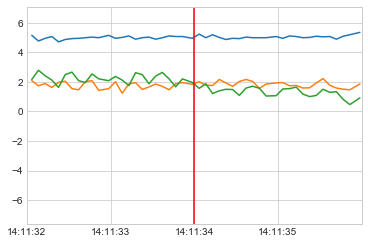

In [155]:
fig = plt.figure()
ax = plt.axes()

time_frame = 2

pad = 1

whole_print = acc[ (acc[ 'time_samp' ] > (start_time - dt.timedelta(seconds = (time_frame + pad))) ) & (acc[ 'time_samp' ] < (end_time + dt.timedelta(seconds = (time_frame + pad)) ) ) ]

overall_min = np.min( [np.min(whole_print['x_cal']), np.min(whole_print['y_cal']), np.min(whole_print['z_cal']) ] )
overall_max = np.max( [np.max(whole_print['x_cal']), np.max(whole_print['y_cal']), np.max(whole_print['z_cal']) ] ) + 1


ax.plot(short[ 'time_samp' ], short['x_cal'])
ax.plot(short[ 'time_samp' ], short['y_cal'])
ax.plot(short[ 'time_samp' ], short['z_cal'])
plt.xlim((start_time - dt.timedelta(seconds = (time_frame ))),  (start_time + dt.timedelta(seconds = (time_frame)) ))
plt.ylim( overall_min, overall_max )
plt.axvline(curr_time, c = 'r' ) 
